难点主要是在KD树，这里推荐一个比较好的博客：https://blog.csdn.net/suibianshen2012/article/details/51234596  

K临近法基本做法是：  
对给定的训练实例点和输入实例点，首先确定输入实例点的k个最邻近训练实例点，然后利用这k个训练实例点的类的多数来预测输入实例点的类。  

KNN的三大要素：  
1、度量距离：一般选用欧式距离；  
2、k值的选择：如果k选择的过小，那么模型会比较复杂，模型的方差就会越大，对噪声太过敏感，容易引起过拟合；k值过大，那么模型会过于简单，模型偏差越大，对噪声越不敏感。所以一般我们选择交叉验证的方式来获得最优的k；   
3、分类决策规则：一般是多数表决，对应于经验风险最小化。    

一般来说我们选用带权重的KNN会比较好，我们可以把1/距离作为权重，这样可以避免距离较远的点比较多的时候带来的错误分类。  

KNN项目改进约会网站的配对效果例子如下,参考了：https://github.com/Asia-Lee/KNN/blob/master/KNN.py

In [448]:
import os, sys
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib as mpl
import operator

from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
import warnings

warnings.filterwarnings('ignore')

In [449]:
# 读取数据并处理
def readData(filename):
    with open(filename,'r') as fr:
        arrayOLines = fr.readlines()
        numberOfLines = len(arrayOLines)
        # 返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
        returnMat = np.zeros((numberOfLines, 3))
        # 返回的分类标签向量
        classLabelVector = []
        # 行的索引值
        index = 0
        for line in arrayOLines:
            line = line.strip()
            listFromLine = line.split('\t')
            # 将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
            returnMat[index, :] = listFromLine[0:3]
            # 根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
            if listFromLine[-1] == 'didntLike':
                classLabelVector.append(1)
            elif listFromLine[-1] == 'smallDoses':
                classLabelVector.append(2)
            elif listFromLine[-1] == 'largeDoses':
                classLabelVector.append(3)
            index += 1
    return returnMat, classLabelVector

In [450]:
def showData(datingDataMat, datingLabels):
    #设置汉字格式
    # sans-serif就是无衬线字体，是一种通用字体族。
    # 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica, 中文的幼圆、隶书等等
    mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体 SimHei为黑体
    mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    #将fig画布分隔成2行2列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,9))

    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label

    axs0_title_text = axs[0][0].set_title('每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
    axs0_xlabel_text = axs[0][0].set_xlabel('每年获得的飞行常客里程数')
    axs0_ylabel_text = axs[0][0].set_ylabel('玩视频游戏所消耗时间占')
    plt.setp(axs0_title_text, size=12, weight='bold', color='red')
    plt.setp(axs0_xlabel_text, size=10, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=10, weight='bold', color='black')


    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title('每年获得的飞行常客里程数与每周消费的冰激淋公升数',)
    axs1_xlabel_text = axs[0][1].set_xlabel('每年获得的飞行常客里程数')
    axs1_ylabel_text = axs[0][1].set_ylabel('每周消费的冰激淋公升数')
    plt.setp(axs1_title_text, size=12, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=10, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=10, weight='bold', color='black')


    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title('玩视频游戏所消耗时间占比与每周消费的冰激淋公升数')
    axs2_xlabel_text = axs[1][0].set_xlabel('玩视频游戏所消耗时间占比')
    axs2_ylabel_text = axs[1][0].set_ylabel('每周消费的冰激淋公升数')
    plt.setp(axs2_title_text, size=12, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=10, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=10, weight='bold', color='black')

    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.', markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

In [451]:
# 特征归一化
def featureNormalize(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    #normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals

In [452]:
# KNN分类器
#  dataTest - 用于分类的数据(测试集)
#  dataTrain - 用于训练的数据(训练集)
#  labes - 训练数据的分类标签
#  k - kNN算法参数,选择距离最小的k个点
#  sortedClassCount[0][0] - 分类结果
def KNN(dataTest, dataTrain, labels, k):
    #返回样本数
    dataTrainSize = dataTrain.shape[0]
    sqDiffMat = (np.tile(dataTest, (dataTrainSize, 1)) - dataTrain)**2
    #sum()所有元素相加,sum(0)列相加,sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 欧式距离
    distance = sqDistances**0.5
    # 根据距离大小进行排序
    sortedDistIndices = distance.argsort()
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

In [453]:
# 测试分类器的准确率
def testKNN(dataPath, k):
    trainDataMat, trainLabels = readData(dataPath)
    #取所有数据的百分之十
    testRate = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = featureNormalize(trainDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * testRate)
    errorCount = 0.0
    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = KNN(normMat[i,:], normMat[numTestVecs:m,:],trainLabels[numTestVecs:m], k)
        #print("分类结果:%d\t真实类别:%d" % (classifierResult, trainLabels[i]))
        if classifierResult != trainLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))
    

In [454]:
# 定义一个分类器
def predict(dataPath, dataTest):
    resultList = ['didntLike','smallDoses','largeDoses']
    trainDataMat, trainLabels = readData(dataPath)
    #训练集归一化
    normMat, ranges, minVals = featureNormalize(trainDataMat)
    normDataTest = (dataTest - minVals) / ranges
    #返回分类结果
    classifierResult = KNN(normDataTest, normMat, trainLabels, 3)
    #打印结果
    print("你可能 %s 这个人" % (resultList[classifierResult-1]))

In [455]:
# k folds 产生一个迭代器
def KFold(n,n_folds=5,shuffe=False):
    """
    n -- len（trainData）
    K-Folds cross validation iterator.
    Provides train/test indices to split data in train test sets. Split dataset 
    into k consecutive folds (without shuffling by default).
    Each fold is then used a validation set once while the k - 1 remaining fold form the training set.
    Example:
    ------
    X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
    y = np.array([1, 2, 3, 4])
    kf = KFold(4, n_folds=2)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print("TRAIN:", train_index, "TEST:", test_index)
    TRAIN: [2 3] TEST: [0 1]
    TRAIN: [0 1] TEST: [2 3]
    """
    idx = np.arange(n)
    if shuffe:
        idx = np.random.permutation(idx)
    fold_sizes = (n // n_folds) * np.ones(n_folds, dtype=np.int) # folds have size n // n_folds
    fold_sizes[:n % n_folds] += 1 # The first n % n_folds folds have size n // n_folds + 1
    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        train_index = list(np.concatenate((idx[:start], idx[stop:])))
        test_index = list(idx[start:stop])
        yield train_index, test_index
        current = stop # move one step forward
        
def crossValidate(dataPath, n_folds, k):
    errorCount = 0.0
    X, y = readData(dataPath)
    kf = KFold(len(y), n_folds=n_folds)
    
    y_train = []
    y_test = []
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        
        for i in train_index:
            y_train.append(y[i])
        for j in test_index:
            y_test.append(y[j])
        #y_train,  = y[train_index], y[test_index]
        
        normMatTrain, ranges, minVals = featureNormalize(X_train)
        normMatTest, ranges, minVals = featureNormalize(X_test)
        for i in range(len(normMatTest)):
            classifierResult = KNN(normMatTest[i,:], normMatTrain[:], y_train[:], k)
            if classifierResult != y_test[i]:
                errorCount += 1.0
    return errorCount/n_folds

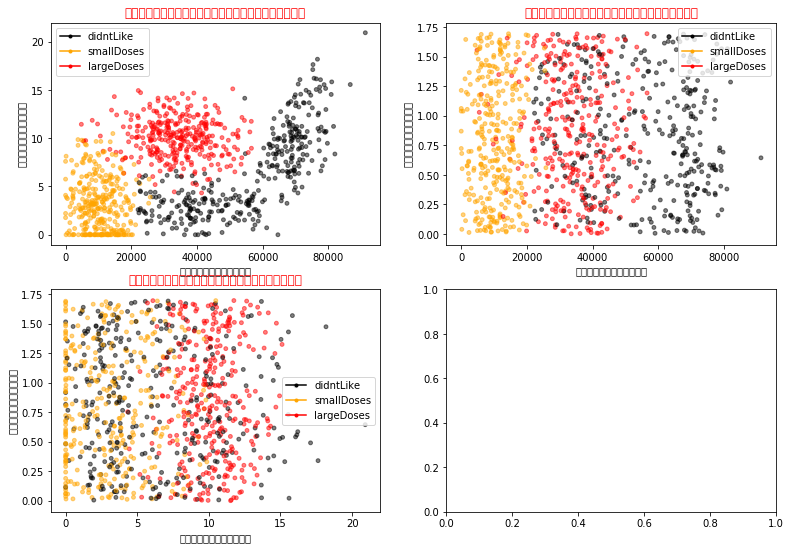

错误率:5.000000%
你可能 largeDoses 这个人
[3.035, 3.035, 3.125, 3.15, 3.095, 2.995, 3.05, 3.035, 3.035, 3.06, 3.02, 3.0, 3.01, 3.025, 3.01, 3.02, 3.025, 3.04, 3.02, 3.035]
K折交叉验证: 

最优的k为:  5


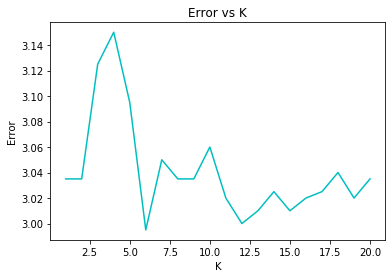

In [456]:
if __name__ == '__main__':
    dataPath = './data/datingTestSet.txt'
    #这里我们选择k为5，即前五个然后投票，最好是采用交叉验证的方式获得最优的k
    k = 3
    
    #可视化训练数据
    showData(datingDataMat, datingLabels)
    #选取10%作为验证集，来测试分类器的性能
    testKNN(dataPath, k)
    #inference用
    dataTest = [28782, 6.593803, 0.187108]
    predict(dataPath, dataTest)
    
    #交叉验证
    errors = []
    for i in range(20):
        error = crossValidate(dataPath, 200, k=i+1)
        errors.append(error)
    print(errors)
    print("K折交叉验证: \n")
    
    xs = np.arange(len(errors)) + 1
    plt.plot(xs,errors,color='c')
    plt.xlabel('K')
    plt.ylabel('Error')
    plt.title('Error vs K')
    print("最优的k为: ", errors.index(min(errors)))